## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi','rust','dart','kotlin')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format 

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [4]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [5]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,84
4,2008-08-01 00:00:00,python,124


In [6]:
df.tail()

,DATE,TAG,POSTS
2632,2021-08-01 00:00:00,php,5163
2633,2021-08-01 00:00:00,swift,2306
2634,2021-08-01 00:00:00,r,4712
2635,2021-08-01 00:00:00,ruby,520
2636,2021-08-01 00:00:00,rust,505


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [7]:
df.shape

(2637, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [8]:
df.count()

DATE     2637
TAG      2637
POSTS    2637
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [9]:
df.groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2261130
java,1794183
python,1783053
c#,1494188
php,1411738
c++,735092
r,416455
c,363590
swift,301108


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [10]:
df.groupby('TAG').count().sort_values('POSTS', ascending=False)

,DATE,POSTS
TAG,,
c#,158,158
assembly,157,157
php,157,157
c++,157,157
ruby,157,157
delphi,157,157
java,157,157
javascript,157,157
c,157,157


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [12]:
df.DATE[1]

'2008-08-01 00:00:00'

In [13]:
type(df['DATE'][1])

str

In [14]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [15]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,84
4,2008-08-01,python,124


## Data Manipulation



In [16]:
test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu', 'Sylvester'],
                        'Power': [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


In [17]:
pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


**Challenge**: Can you pivot the df DataFrame so that each row is a date and each column is a programming language? Store the result under a variable called reshaped_df.

In [18]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df

TAG,assembly,c,c#,c++,dart,delphi,go,java,javascript,julia,kotlin,perl,php,python,r,ruby,rust,swift
DATE,,,,,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,84.00,507.00,164.00,NaN,14.00,NaN,222.00,163.00,NaN,NaN,28.00,160.00,124.00,NaN,71.00,NaN,NaN
2008-09-01,28.00,320.00,"1,648.00",754.00,NaN,105.00,NaN,"1,136.00",639.00,NaN,NaN,131.00,480.00,540.00,6.00,289.00,NaN,NaN
2008-10-01,15.00,303.00,"1,989.00",810.00,NaN,112.00,NaN,"1,154.00",726.00,NaN,NaN,127.00,615.00,510.00,NaN,249.00,NaN,NaN
2008-11-01,17.00,259.00,"1,733.00",734.00,NaN,141.00,NaN,958.00,579.00,NaN,NaN,97.00,503.00,452.00,1.00,159.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,344.00,"2,457.00","6,777.00","4,351.00","1,901.00",186.00,685.00,"9,531.00","18,692.00",151.00,"1,633.00",143.00,"5,120.00","26,563.00","5,615.00",605.00,602.00,"2,531.00"
2021-05-01,327.00,"2,261.00","6,578.00","4,603.00","2,026.00",179.00,701.00,"9,720.00","18,486.00",149.00,"1,671.00",122.00,"5,098.00","26,138.00","5,404.00",447.00,525.00,"2,213.00"
2021-06-01,285.00,"2,013.00","6,462.00","4,197.00","1,962.00",133.00,649.00,"9,264.00","17,737.00",149.00,"1,737.00",157.00,"4,902.00","24,643.00","4,958.00",470.00,533.00,"2,129.00"


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [19]:
reshaped_df.shape

(158, 18)

In [20]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'dart', 'delphi', 'go', 'java',
       'javascript', 'julia', 'kotlin', 'perl', 'php', 'python', 'r', 'ruby',
       'rust', 'swift'],
      dtype='object', name='TAG')

In [21]:
reshaped_df.head()

TAG,assembly,c,c#,c++,dart,delphi,go,java,javascript,julia,kotlin,perl,php,python,r,ruby,rust,swift
DATE,,,,,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.00,84.00,507.00,164.00,NaN,14.00,NaN,222.00,163.00,NaN,NaN,28.00,160.00,124.00,NaN,71.00,NaN,NaN
2008-09-01,28.00,320.00,"1,648.00",754.00,NaN,105.00,NaN,"1,136.00",639.00,NaN,NaN,131.00,480.00,540.00,6.00,289.00,NaN,NaN
2008-10-01,15.00,303.00,"1,989.00",810.00,NaN,112.00,NaN,"1,154.00",726.00,NaN,NaN,127.00,615.00,510.00,NaN,249.00,NaN,NaN
2008-11-01,17.00,259.00,"1,733.00",734.00,NaN,141.00,NaN,958.00,579.00,NaN,NaN,97.00,503.00,452.00,1.00,159.00,NaN,NaN


In [22]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,dart,delphi,go,java,javascript,julia,kotlin,perl,php,python,r,ruby,rust,swift
DATE,,,,,,,,,,,,,,,,,,
2021-04-01,344.00,"2,457.00","6,777.00","4,351.00","1,901.00",186.00,685.00,"9,531.00","18,692.00",151.00,"1,633.00",143.00,"5,120.00","26,563.00","5,615.00",605.00,602.00,"2,531.00"
2021-05-01,327.00,"2,261.00","6,578.00","4,603.00","2,026.00",179.00,701.00,"9,720.00","18,486.00",149.00,"1,671.00",122.00,"5,098.00","26,138.00","5,404.00",447.00,525.00,"2,213.00"
2021-06-01,285.00,"2,013.00","6,462.00","4,197.00","1,962.00",133.00,649.00,"9,264.00","17,737.00",149.00,"1,737.00",157.00,"4,902.00","24,643.00","4,958.00",470.00,533.00,"2,129.00"
2021-07-01,200.00,"1,732.00","5,981.00","3,822.00","1,787.00",148.00,653.00,"8,423.00","17,516.00",198.00,"1,643.00",140.00,"4,669.00","24,302.00","4,694.00",501.00,531.00,"2,287.00"
2021-08-01,181.00,"1,719.00","6,290.00","3,768.00","1,962.00",141.00,861.00,"8,518.00","18,004.00",138.00,"1,737.00",129.00,"5,163.00","24,431.00","4,712.00",520.00,505.00,"2,306.00"


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [23]:
reshaped_df.count()

TAG
assembly      157
c             157
c#            158
c++           157
dart          120
delphi        157
go            142
java          157
javascript    157
julia         110
kotlin        121
perl          157
php           157
python        157
r             155
ruby          157
rust          112
swift         149
dtype: int64

In [24]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,dart,delphi,go,java,javascript,julia,kotlin,perl,php,python,r,ruby,rust,swift
DATE,,,,,,,,,,,,,,,,,,
2008-07-01,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2008-08-01,8.00,84.00,507.00,164.00,0.00,14.00,0.00,222.00,163.00,0.00,0.00,28.00,160.00,124.00,0.00,71.00,0.00,0.00
2008-09-01,28.00,320.00,"1,648.00",754.00,0.00,105.00,0.00,"1,136.00",639.00,0.00,0.00,131.00,480.00,540.00,6.00,289.00,0.00,0.00
2008-10-01,15.00,303.00,"1,989.00",810.00,0.00,112.00,0.00,"1,154.00",726.00,0.00,0.00,127.00,615.00,510.00,0.00,249.00,0.00,0.00
2008-11-01,17.00,259.00,"1,733.00",734.00,0.00,141.00,0.00,958.00,579.00,0.00,0.00,97.00,503.00,452.00,1.00,159.00,0.00,0.00


In [25]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

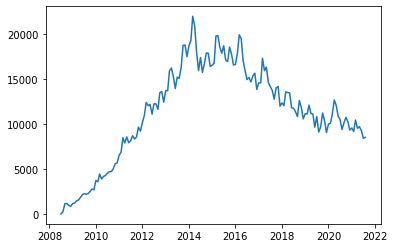

In [28]:
plt.plot(reshaped_df.index, reshaped_df.java)

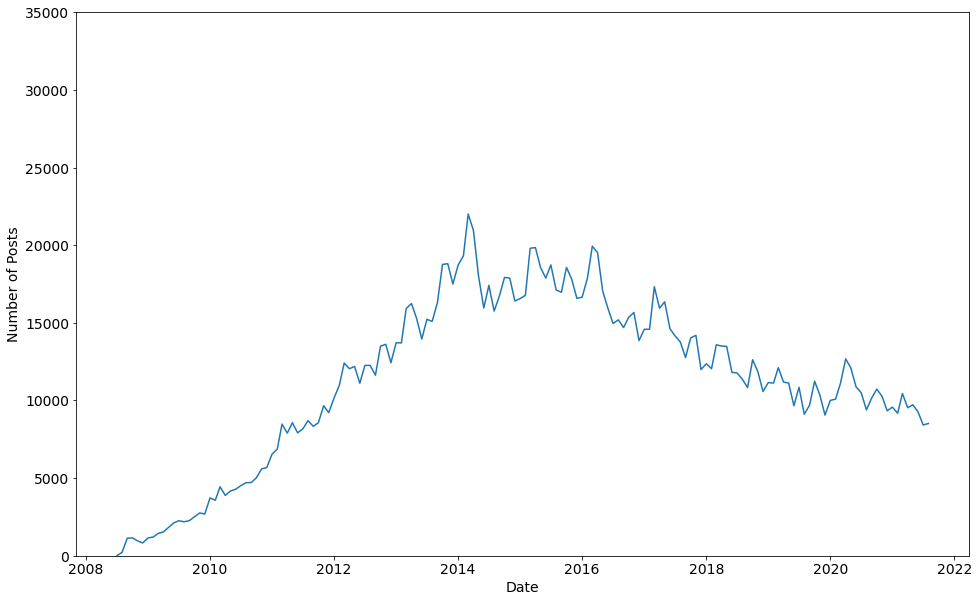

In [33]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

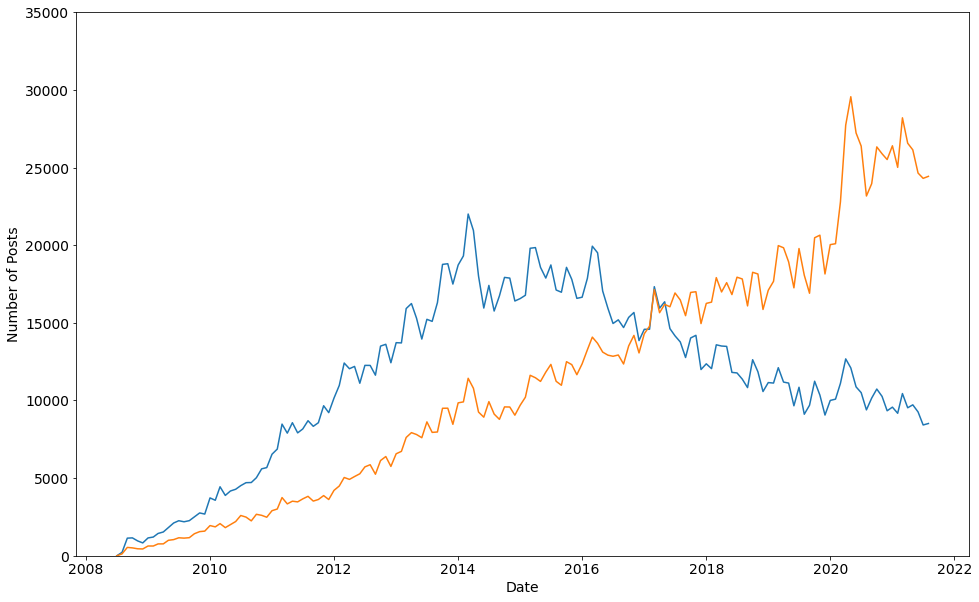

In [37]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

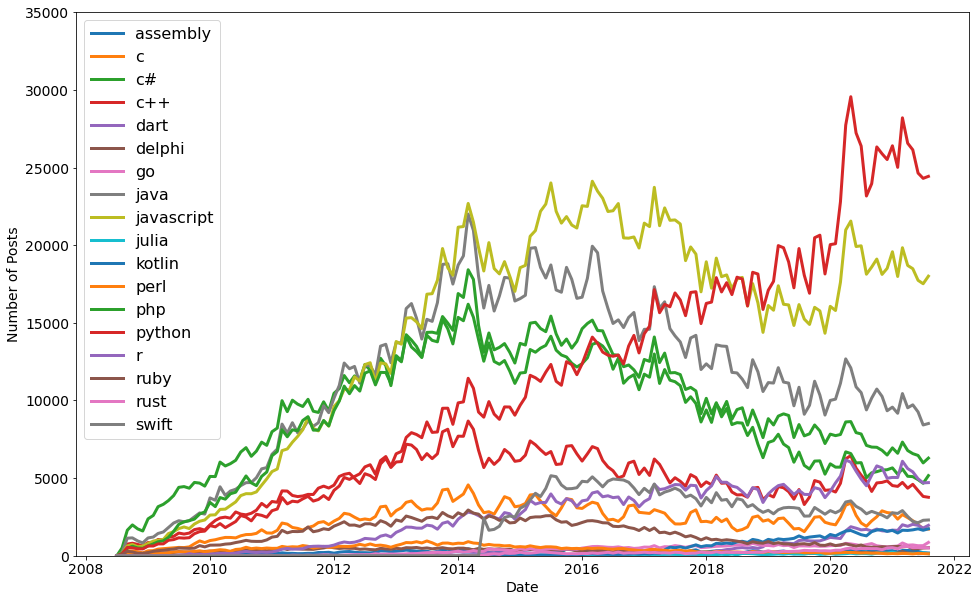

In [40]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot all languages using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

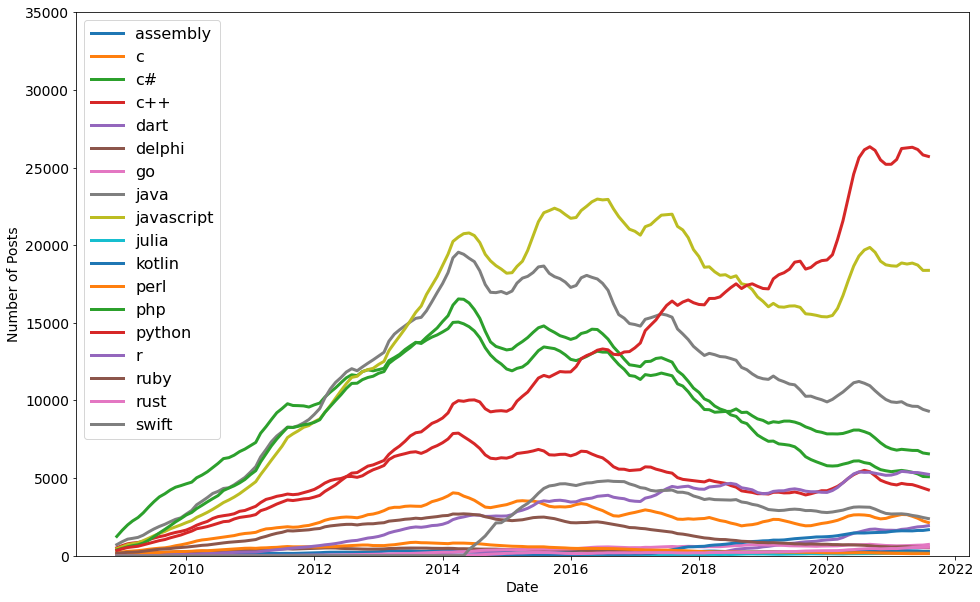

In [44]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# Plot all languages using for loop
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)